In [ ]:
#All the required libraries are imported here
from google.colab import drive
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data.dataset import Dataset
from torchvision.transforms import ToPILImage, Compose, ToTensor, Resize, Normalize
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from torchvision import transforms
from PIL import Image
import seaborn as sns
from torch.utils.data.dataset import Dataset, Subset
from sklearn.model_selection import KFold

In [ ]:
#Setting the path up for the dataset. Dataset is in Goole Drive
drive.mount('/content/drive', force_remount=True)
dir_path = "/content/drive/My Drive/Face Mask Detection/Datasets"
save_dir = "/content/drive/My Drive/Face Mask Detection/loaded_images.npy"
model_dir = "/content/drive/My Drive/Face Mask Detection/saved_model"
sample_image_path = "/content/drive/My Drive/Face Mask Detection/test"

Mounted at /content/drive


In [ ]:
classes = os.listdir(dir_path)
print(classes)

['cloth_mask', 'ffp2_mask', 'surgical_mask', 'without_mask']


In [ ]:
label = [i for i in range(len(classes))]
print(label)


label_dict = dict(zip(classes,label))
print(label_dict)

category_label = dict(zip(label, classes))
print(category_label)

[0, 1, 2, 3]
{'cloth_mask': 0, 'ffp2_mask': 1, 'surgical_mask': 2, 'without_mask': 3}
{0: 'cloth_mask', 1: 'ffp2_mask', 2: 'surgical_mask', 3: 'without_mask'}


In [ ]:
data = []
#labels = []
for label in tqdm(classes):
  data_path = os.path.join(dir_path, label)
  print("Data Path", data_path)
  image_names = os.listdir(data_path)
  print("Image Name", image_names)
  for image in tqdm(image_names):
    image_path = os.path.join(data_path, image)
    images = cv2.imread(image_path) 
    try:
      imag = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
      img = cv2.resize(imag, (100,100))
        
      data.append((img, label_dict[label]))
      
    except Exception as e:
      print(e)

  0%|          | 0/4 [00:00<?, ?it/s]

Data Path /content/drive/My Drive/Face Mask Detection/Datasets/cloth_mask
Image Name ['000 4.jpg', '003 2 (1).jpg', '003 2.jpg', '005.jpg', '001.jpg', '002 2.jpg', '000 3.jpg', '004.jpg', '003.jpg', '002.jpg', '000 2.jpg', '000.jpg', '3555.png', '4611.png', '4370.png', '5124.png', '3556.png', '4160.png', '3529.png', '3890.png', '3646.png', '3500.png', '4581.png', '4526 (1).png', '4526.png', '4421.png', '3438.png', '4418.png', '3342.png', '3311.png', '4286.png', '4922.png', '4635.png', '3548.png', '3046.png', '4414 (1).png', '4414.png', '4016.png', '3447.png', '3617.png', '4415 (1).png', '4415.png', '4227.png', '3669.png', '3388.png', '4632.png', '3595.png', '3395.png', '3849.png', '4529.png', '4103.png', '5119.png', '4946.png', '4398 (1).png', '3710.png', '4398.png', '4189.png', '4125.png', '4387.png', '3794.png', '4225.png', '4152.png', '4238.png', '4468.png', '3884.png', '4090.png', '4898.png', '3921.png', '3331.png', '3880.png', '3787.png', '4626.png', '3995.png', '4148.png', '3760.


 25%|██▌       | 1/4 [11:16<33:48, 676.23s/it]

Data Path /content/drive/My Drive/Face Mask Detection/Datasets/ffp2_mask
Image Name ['62.jpg', 'mask戴口罩_43.jpg', 'mask戴口罩_48.jpg', 'mask戴口罩_71.jpg', 'mask戴口罩_67.jpg', 'mask戴口罩_103 (1).jpg', 'mask戴口罩_112.jpg', 'mask戴口罩_110.jpg', 'mask戴口罩_103.jpg', '000.jpg', '006.jpg', '005.jpg', '004.jpg', '008.jpg', '000 2.jpg', '009.jpg', '002.jpg', '000 3.jpg', '000 4.jpg', '4501.png', '3994.png', '3661.png', '4101 (1).png', '4937.png', '4101.png', '3140.png', '4413.png', '4480.png', '4607.png', '4523.png', '3590.png', '3930.png', '4211.png', '3701.png', '3620.png', '3099.png', '4369.png', '5194.jpg', '3926.png', '3851.png', '4543.png', '3435.png', '4482.png', '3110.png', '4614.png', '3175.png', '3454.png', '3336 (1).png', '3336.png', '3552.png', '4573.png', '4696.png', '4397.png', '3731.png', '3799.png', '3092.png', '3152.png', '3706.png', '4838.png', '5077.jpg', '3629.png', '4407.png', '4337.png', '3671.png', '5251.jpg', '3783.png', '3744.png', '3757.png', '3021.png', '5110.jpg', '4935.png', '4359


 55%|█████▌    | 338/612 [04:50<01:54,  2.40it/s]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 50%|█████     | 2/4 [18:14<17:29, 524.72s/it]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Data Path /content/drive/My Drive/Face Mask Detection/Datasets/surgical_mask
Image Name ['00176_Mask.jpg', '00046_Mask.jpg', '00043_Mask.jpg', '00153_Mask.jpg', '00161_Mask.jpg', '00135_Mask.jpg', '00220_Mask.jpg', '00259_Mask.jpg', '00288_Mask.jpg', '00343_Mask.jpg', '00171_Mask.jpg', '00311_Mask.jpg', '00317_Mask.jpg', '00023_Mask.jpg', '00292_Mask.jpg', '00066_Mask.jpg', '00067_Mask.jpg', '00150_Mask.jpg', '00125_Mask.jpg', '00190_Mask.jpg', '00321_Mask.jpg', '00243_Mask.jpg', '00319_Mask.jpg', '00128_Mask.jpg', '00148_Mask.jpg', '00187_Mask.jpg', '00124_Mask.jpg', '00328_Mask.jpg', '00136_Mask.jpg', '00229_Mask.jpg', '00299_Mask.jpg', '00038_Mask.jpg', '00082_Mask.jpg', '00073_Mask.jpg', '00036_Mask.jpg', '00226_Mask.jpg', '00348_Mask.jpg', '00276_Mask.jpg', '00216_Mask.jpg', '00065_Mask.jpg', '00314_Mask.jpg', '00026_Mask.jpg', '00047_Mask.jpg', '00293_M


 75%|███████▌  | 3/4 [31:33<10:49, 649.97s/it]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Data Path /content/drive/My Drive/Face Mask Detection/Datasets/without_mask
Image Name ['person_151.jpg', 'person_639.jpg', 'person_693.jpg', 'person_288.jpg', 'person_513.jpg', 'person_93.jpg', 'person_190.jpg', 'person_431.jpg', 'person_347.jpg', 'person_205.jpg', 'person_581.jpg', 'person_400.jpg', 'person_631.jpg', 'person_278.jpg', 'person_94.jpg', 'person_669.jpg', 'person_258.jpg', 'person_551.jpg', 'person_525.jpg', 'person_680.jpg', 'person_69.jpg', 'person_255.jpg', 'person_178.jpg', 'person_464.jpg', 'person_346.jpg', 'person_14.jpg', 'person_653.jpg', 'person_493.jpg', 'person_45.jpg', 'person_220.jpg', 'person_300.jpg', 'person_161.jpg', 'person_660.jpg', 'person_654.jpg', 'person_387.jpg', 'person_363.jpg', 'person_550.jpg', 'person_586.jpg', 'person_68.jpg', 'person_137.jpg', 'person_435.jpg', 'person_221.jpg', 'person_623.jpg', 'person_158.jpg


100%|██████████| 4/4 [37:03<00:00, 555.87s/it]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



In [ ]:
np.random.shuffle(data)  
np.save(save_dir, data)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
#Customized Dataset class to set and get the data.
class FaceMaskDataset(Dataset):
  #saving the data
  def __init__(self, data):
    self.data = data
    self.transformation = transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                                   transforms.Resize((100,100))
                                   ])
  
  def __getitem__(self, id):
    return self.transformation(self.data[id][0]), torch.tensor(self.data[id][1])
  
  def __len__(self):
    return self.data.__len__()

In [ ]:
"""
#This will load the saved data and then split it into two parts and then load the data 
#using DataLoader() method with some batch_size.
def data_loader(save_dir):
  data = np.load(save_dir, allow_pickle=True)

  training_data, testing_data = train_test_split(data, test_size = 0.3, random_state = 0)

  training_dataset = FaceMaskDataset(training_data)
  testing_dataset = FaceMaskDataset(testing_data)

  train_loader = DataLoader(training_dataset, batch_size=32)
  test_loader = DataLoader(testing_dataset, batch_size=32)

  return train_loader, test_loader
  """

In [ ]:
def dataset_loader(save_dir):
  data = np.load(save_dir, allow_pickle=True)
  loaded_dataset = FaceMaskDataset(data)
  return loaded_dataset

In [ ]:
loaded_dataset = dataset_loader(save_dir)
print(len(loaded_dataset))
kfold = KFold(n_splits=10, shuffle=True, random_state=None)
fold_value = 1
for training_id, testing_id in kfold.split(loaded_dataset):
  print("Fold Number:", fold_value)

  training_dataset = Subset(loaded_dataset, training_id)
  testing_dataset = Subset(loaded_dataset, testing_id)
  train_loader = DataLoader(training_dataset, batch_size=64, num_workers=0, shuffle=True)
  test_loader = DataLoader(testing_dataset, batch_size=64, num_workers=0, shuffle=True)
  model = model_trainer(train_loader, test_loader, 10)
  model_name = "Model_Number_" + str(fold_value)
  testing_model(model, model_name, test_loader)
  fold_value+=1

2736
Fold Number: 1
Epoch [1/10], Loss: 0.4736, Accuracy: 76.67%
Epoch [2/10], Loss: 0.2583, Accuracy: 90.00%
Epoch [3/10], Loss: 0.2516, Accuracy: 90.00%
Epoch [4/10], Loss: 0.1601, Accuracy: 96.67%
Epoch [5/10], Loss: 0.1473, Accuracy: 100.00%
Epoch [6/10], Loss: 0.0719, Accuracy: 100.00%
Epoch [7/10], Loss: 0.1282, Accuracy: 96.67%
Epoch [8/10], Loss: 0.0461, Accuracy: 100.00%
Epoch [9/10], Loss: 0.0177, Accuracy: 100.00%
Epoch [10/10], Loss: 0.0142, Accuracy: 100.00%
[2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 2, 3, 2, 2, 0, 2, 1, 3, 3, 1, 2, 3, 1, 1, 2, 2, 1, 3, 0, 3, 2, 0, 1, 1, 3, 3, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 3, 1, 2, 1, 0, 3, 0, 1, 1, 3, 2, 0, 2, 2, 2, 0, 0, 0, 0, 3, 1, 0, 3, 3, 0, 2, 2, 3, 1, 0, 0, 3, 0, 3, 3, 2, 0, 2, 2, 3, 1, 0, 2, 3, 1, 1, 3, 3, 3, 0, 1, 0, 1, 1, 1, 3, 1, 1, 2, 1, 0, 2, 0, 3, 0, 2, 1, 2, 2, 2, 0, 2, 2, 3, 3, 3, 1, 0, 1, 1, 3, 1, 2, 0, 1, 1, 2, 1, 3, 3, 2, 0, 1, 2, 3, 1, 1, 2, 0, 2, 2, 2, 0, 2, 3, 3, 2, 3, 2, 3, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 3, 1, 1, 2, 3

In [ ]:
#Confusion Matrix - Accuracy, f-measure, recall and precision and also plotting confusion Matrix
def testing_model(model, title, data_loader):
  model.eval()
  prediction_list = []
  accurate_list = []
  with torch.no_grad():
    for images, labels in data_loader:
      outputs = model(images)
      _, predicted = torch.max(model(images), 1)
      prediction_list.extend(predicted.detach().cpu().numpy())
      accurate_list.extend(labels.detach().cpu().numpy())
  print(prediction_list)
  print(accurate_list)
  print("{} Classification Report: ".format(title))
  print(classification_report(prediction_list, accurate_list))

In [ ]:
#train_loader, test_loader = data_loader(save_dir)

In [ ]:
#CNN Architecture to train the model.
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv_layer = nn.Sequential(
        #Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout2d(p=0.02),
        
        #Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout2d(p=0.02),
        
        #Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout2d(p=0.02),
        
        #Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    
        nn.Dropout2d(p=0.05),
    )
    
    #Fully Connected Layer
    self.linear_layers = nn.Sequential(
        nn.Dropout(p=0.1),
        nn.Linear(512 * 6 * 6, 128),
        nn.ReLU(inplace=True),
        nn.Linear(128, 64),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.1),
        nn.Linear(64,4)
    )

  def forward(self, x):
    x = self.conv_layer(x)
    #print(x.shape)
    x = x.view(x.size(0), -1)
    x = self.linear_layers(x)
    return x

In [ ]:
#This method will train the dataset according to the specified epoch number.
def model_trainer(train_loader, test_loader, epoch_number):
  model = CNN()

  loss_criteria = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

  total_step = len(train_loader)
  training_accuracy_list = []
  training_loss_list = []

  for epoch in range(epoch_number):
    for i, (images, labels) in enumerate(train_loader):
      outputs = model(images)

      #Forward Pass
      training_loss = loss_criteria(outputs, labels)
      training_loss_list.append(training_loss.item())

      #Backpropogation and Optimization
      optimizer.zero_grad()
      training_loss.backward()
      optimizer.step()

      #Training Accuracy
      total = labels.size(0)
      _, predicted = torch.max(outputs.data, 1)
      correct = (predicted == labels).sum().item()
      training_accuracy_list.append(correct / total)

    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
        .format(epoch + 1, epoch_number, training_loss.item(),
        (correct / total) * 100))

  return model

In [ ]:
model = model_trainer(train_loader, test_loader, epoch_number=10)

Epoch [1/10], Loss: 0.5661, Accuracy: 70.37%
Epoch [2/10], Loss: 0.4256, Accuracy: 77.78%
Epoch [3/10], Loss: 0.3172, Accuracy: 85.19%
Epoch [4/10], Loss: 0.2572, Accuracy: 88.89%
Epoch [5/10], Loss: 0.2055, Accuracy: 96.30%
Epoch [6/10], Loss: 0.0776, Accuracy: 96.30%
Epoch [7/10], Loss: 0.0780, Accuracy: 100.00%
Epoch [8/10], Loss: 0.1254, Accuracy: 88.89%
Epoch [9/10], Loss: 0.0125, Accuracy: 100.00%
Epoch [10/10], Loss: 0.0314, Accuracy: 100.00%


In [ ]:
#This method will save the model onto a pre-specified path.
def save_model(model, model_name, model_save_dir):
  torch.save(model.state_dict(), "{}/{}".format(model_save_dir, model_name))    

In [ ]:
model_name = "COMP6721-AI-Project-1"
save_model(model, model_name, model_dir)

In [ ]:
def load_data(data, path, label):
  
  #labels = []
  image_names = os.listdir(path)
  print("Image Name", image_names)
  print("Image Labels", label)
  for image in tqdm(image_names):
    image_path = os.path.join(path, image)
    images = cv2.imread(image_path) 
    try:
      imag = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
      img = cv2.resize(imag, (100,100))
          
      data.append((img, label))
        
    except Exception as e:
      print(e)
  return data

In [ ]:
#Entering some drive location of testing dataset
cloth_mask_male_dir = "/content/drive/My Drive/Face Mask Detection/test_data/gender/cloth_mask_male"
cloth_mask_female_dir = "/content/drive/My Drive/Face Mask Detection/test_data/gender/cloth_mask_female"
cloth_mask_child_dir = "/content/drive/My Drive/Face Mask Detection/test_data/age/cloth_mask_child"
cloth_mask_young_dir = "/content/drive/My Drive/Face Mask Detection/test_data/age/cloth_mask_young"
cloth_mask_old_dir = "/content/drive/My Drive/Face Mask Detection/test_data/age/cloth_mask_old"

#Getting surgical mask data
surgical_mask_male_dir = "/content/drive/My Drive/Face Mask Detection/test_data/gender/surgical_mask_male"
surgical_mask_female_dir = "/content/drive/My Drive/Face Mask Detection/test_data/gender/surgical_mask_female"
surgical_mask_child_dir = "/content/drive/My Drive/Face Mask Detection/test_data/age/surgical_mask_child"
surgical_mask_young_dir = "/content/drive/My Drive/Face Mask Detection/test_data/age/surgical_mask_young"
surgical_mask_old_dir = "/content/drive/My Drive/Face Mask Detection/test_data/age/surgical_mask_old"

#Getting Without mask data
without_mask_male_dir = "/content/drive/My Drive/Face Mask Detection/test_data/gender/without_mask_male"
without_mask_female_dir = "/content/drive/My Drive/Face Mask Detection/test_data/gender/without_mask_female"
without_mask_child_dir = "/content/drive/My Drive/Face Mask Detection/test_data/age/without_mask_child"
without_mask_young_dir = "/content/drive/My Drive/Face Mask Detection/test_data/age/without_mask_young"
without_mask_old_dir = "/content/drive/My Drive/Face Mask Detection/test_data/age/without_mask_old"

#Getting ffp2 mask data
ffp2_mask_male_dir = "/content/drive/My Drive/Face Mask Detection/test_data/gender/ffp2_mask_male"
ffp2_mask_female_dir = "/content/drive/My Drive/Face Mask Detection/test_data/gender/ffp2_mask_female"
ffp2_mask_child_dir = "/content/drive/My Drive/Face Mask Detection/test_data/age/ffp2_mask_child"
ffp2_mask_young_dir = "/content/drive/My Drive/Face Mask Detection/test_data/age/ffp2_mask_young"
ffp2_mask_old_dir = "/content/drive/My Drive/Face Mask Detection/test_data/age/ffp2_mask_old"

#Getting testing dataset
cloth_testing_dataset = "/content/drive/My Drive/Face Mask Detection/testing_dataset/cloth_mask"
ffp2_testing_dataset = "/content/drive/My Drive/Face Mask Detection/testing_dataset/ffp2_mask"
surgical_testing_dataset = "/content/drive/My Drive/Face Mask Detection/testing_dataset/surgical_mask"
without_mask_testing_dataset = "/content/drive/My Drive/Face Mask Detection/testing_dataset/without_mask"

In [ ]:
print("-----------Cloth Mask worn by Male-----------")
mask_male_data = []
mask_male_data = load_data(mask_male_data, cloth_mask_male_dir, 0)
mask_male_data = load_data(mask_male_data, ffp2_mask_male_dir, 1)
mask_male_data = load_data(mask_male_data, surgical_mask_male_dir, 2)
mask_male_data = load_data(mask_male_data, without_mask_male_dir, 3)

print("-----------Cloth Mask worn by Female-----------")
mask_female_data = []
mask_female_data = load_data(mask_female_data, cloth_mask_female_dir, 0)
mask_female_data = load_data(mask_female_data, ffp2_mask_female_dir, 1)
mask_female_data = load_data(mask_female_data, surgical_mask_female_dir, 2)
mask_female_data = load_data(mask_female_data, without_mask_female_dir, 3)

print("-----------Cloth Mask worn by Child-----------")
mask_child_data = []
mask_child_data = load_data(mask_child_data, cloth_mask_child_dir, 0)
mask_child_data = load_data(mask_child_data, ffp2_mask_child_dir, 1)
mask_child_data = load_data(mask_child_data, surgical_mask_child_dir, 2)
mask_child_data = load_data(mask_child_data, without_mask_child_dir, 3)

print("-----------Cloth Mask worn by Young-----------")
mask_young_data = []
mask_young_data = load_data(mask_young_data, cloth_mask_young_dir, 0)
mask_young_data = load_data(mask_young_data, ffp2_mask_young_dir, 1)
mask_young_data = load_data(mask_young_data, surgical_mask_young_dir, 2)
mask_young_data = load_data(mask_young_data, without_mask_young_dir, 3)

print("-----------Cloth Mask worn by Old-----------")
mask_old_data = []
mask_old_data = load_data(mask_old_data, cloth_mask_old_dir, 0)
mask_old_data = load_data(mask_old_data, ffp2_mask_old_dir, 1)
mask_old_data = load_data(mask_old_data, surgical_mask_old_dir, 2)
mask_old_data = load_data(mask_old_data, without_mask_old_dir, 3)

-----------Cloth Mask worn by Male-----------
Image Name ['28_0_0_20170117202406775_cloth.jpg', '15_0_0_20170110232117349_cloth.jpg', '13_0_0_20170110225447389_cloth.jpg', '46_0_0_20170104210235844_cloth.jpg', '10_0_0_20170110225537307_cloth.jpg', '46_0_0_20170109015549957_cloth.jpg', '61_0_0_20170113185438888_cloth.jpg', '10_0_0_20170110225505288_cloth.jpg', '71_0_0_20170111222535839_cloth.jpg', '13_0_0_20170110225428740_cloth.jpg', '15_0_0_20170103200850696_cloth.jpg', '15_0_0_20170103201301966_cloth.jpg', '75_0_0_20170111201111541_cloth.jpg', '46_0_0_20170105173017060_cloth.jpg', '10_0_0_20170110225528484_cloth.jpg', '46_0_0_20170103183413994_cloth.jpg', '15_0_0_20170110232327328_cloth.jpg', '61_0_0_20170111202300415_cloth.jpg', '46_0_0_20170104205340845_cloth.jpg', '15_0_0_20170110225617650_cloth.jpg', '46_0_0_20170117173358796_cloth.jpg', '74_0_0_20170120225236353_cloth.jpg', '28_0_0_20170117180538592_cloth.jpg', '28_0_0_20170114033036427_cloth.jpg', '28_0_0_20170117202432502_clot

100%|██████████| 100/100 [00:00<00:00, 275.34it/s]


Image Name ['15_0_0_20170105183251055_N95.jpg', '46_0_0_20170109015549957_N95.jpg', '46_0_0_20170104211749300_N95.jpg', '61_0_0_20170111222237144_N95.jpg', '10_0_4_20170103201924664_N95.jpg', '61_0_0_20170113185456409_N95.jpg', '37_0_0_20170109015606661_N95.jpg', '10_0_0_20170110225505288_N95.jpg', '46_0_0_20170104205340845_N95.jpg', '10_0_0_20170110225557604_N95.jpg', '46_0_0_20170113185333766_N95.jpg', '14_0_0_20170110224516539_N95.jpg', '56_0_0_20170111171747454_N95.jpg', '58_0_0_20170111202848963_N95.jpg', '74_0_0_20170120225714392_N95.jpg', '15_0_0_20170110225617650_N95.jpg', '46_0_0_20170116232849958_N95.jpg', '28_0_0_20170117202432502_N95.jpg', '71_0_0_20170104213443413_N95.jpg', '37_0_0_20170117120612576_N95.jpg', '56_0_0_20170111171747473_N95.jpg', '13_0_0_20170110225447389_N95.jpg', '61_0_0_20170111171747565_N95.jpg', '13_0_0_20170110224625011_N95.jpg', '61_0_0_20170111171747571_N95.jpg', '71_0_0_20170104185305424_N95.jpg', '46_0_0_20170104210235844_N95.jpg', '61_0_0_20170111

100%|██████████| 100/100 [00:00<00:00, 274.89it/s]


Image Name ['02085_Mask.jpg', '02152_Mask.jpg', '02055_Mask.jpg', '02164_Mask.jpg', '02096_Mask.jpg', '02052_Mask.jpg', '02060_Mask.jpg', '02234_Mask.jpg', '02119_Mask.jpg', '02019_Mask.jpg', '02136_Mask.jpg', '02237_Mask.jpg', '02089_Mask.jpg', '02137_Mask.jpg', '02048_Mask.jpg', '02195_Mask.jpg', '02193_Mask.jpg', '02210_Mask.jpg', '02105_Mask.jpg', '02007_Mask.jpg', '02129_Mask.jpg', '02006_Mask.jpg', '02026_Mask.jpg', '02038_Mask.jpg', '02073_Mask.jpg', '02064_Mask.jpg', '02183_Mask.jpg', '02039_Mask.jpg', '02109_Mask.jpg', '02130_Mask.jpg', '02111_Mask.jpg', '02148_Mask.jpg', '02051_Mask.jpg', '02126_Mask.jpg', '02124_Mask.jpg', '02198_Mask.jpg', '02100_Mask.jpg', '02036_Mask.jpg', '02143_Mask.jpg', '02030_Mask.jpg', '02115_Mask.jpg', '02248_Mask.jpg', '02004_Mask.jpg', '02217_Mask.jpg', '02159_Mask.jpg', '02057_Mask.jpg', '02081_Mask.jpg', '02072_Mask.jpg', '02174_Mask.jpg', '02186_Mask.jpg', '02242_Mask.jpg', '02150_Mask.jpg', '02027_Mask.jpg', '02047_Mask.jpg', '02165_Mask.jpg'

100%|██████████| 100/100 [00:07<00:00, 13.49it/s]


Image Name ['37_0_0_20170109015606661.jpg.chip.jpg', '46_0_0_20170104211749300.jpg.chip.jpg', '15_0_0_20170103201316167.jpg.chip.jpg', '58_0_0_20170111171747508.jpg.chip.jpg', '14_0_0_20170110225056665.jpg.chip.jpg', '15_0_0_20170110232443234.jpg.chip.jpg', '74_0_0_20170111224032125.jpg.chip.jpg', '13_0_0_20170110225307195.jpg.chip.jpg', '71_0_0_20170120225641832.jpg.chip.jpg', '75_0_0_20170111202232554.jpg.chip.jpg', '28_0_0_20170117202432502.jpg.chip.jpg', '10_0_0_20170110225546130.jpg.chip.jpg', '28_0_0_20170117180519102.jpg.chip.jpg', '13_0_0_20170103200413990.jpg.chip.jpg', '10_0_0_20170110225557604.jpg.chip.jpg', '74_0_0_20170120225236353.jpg.chip.jpg', '75_0_0_20170111205905746.jpg.chip.jpg', '46_0_0_20170117135809096.jpg.chip.jpg', '28_0_0_20170117180520264.jpg.chip.jpg', '13_0_0_20170110220458081.jpg.chip.jpg', '61_0_0_20170111222237144.jpg.chip.jpg', '71_0_0_20170109015622110.jpg.chip.jpg', '46_0_0_20170117172149820.jpg.chip.jpg', '13_0_0_20170110225438328.jpg.chip.jpg', '15_

100%|██████████| 100/100 [00:00<00:00, 298.42it/s]


-----------Cloth Mask worn by Female-----------
Image Name ['12_1_0_20170109204428993_cloth.jpg', '56_1_0_20170110152839709_cloth.jpg', '56_1_0_20170110153255801_cloth.jpg', '56_1_0_20170110180113129_cloth.jpg', '12_1_0_20170109203240213_cloth.jpg', '12_1_0_20170109203709140_cloth.jpg', '10_1_0_20170109204746535_cloth.jpg', '46_1_0_20170104235642515_cloth.jpg', '71_1_0_20170110140328613_cloth.jpg', '56_1_0_20170110153845590_cloth.jpg', '27_1_4_20170104165220264_cloth.jpg', '27_1_3_20170104235412059_cloth.jpg', '12_1_0_20170117154622148_cloth.jpg', '10_1_0_20170109204435809_cloth.jpg', '10_1_0_20170109204502951_cloth.jpg', '10_1_0_20170109204931156_cloth.jpg', '56_1_0_20170110141656511_cloth.jpg', '39_1_3_20170109141053796_cloth.jpg', '27_1_3_20170109132029072_cloth.jpg', '27_1_3_20170104231741609_cloth.jpg', '12_1_0_20170109205104124_cloth.jpg', '72_1_0_20170110182012800_cloth.jpg', '12_1_0_20170109204815030_cloth.jpg', '10_1_0_20170109204844109_cloth.jpg', '56_1_0_20170110173815028_cl

100%|██████████| 100/100 [00:00<00:00, 288.54it/s]


Image Name ['72_1_0_20170110183814706_N95.jpg', '12_1_0_20170109205104124_N95.jpg', '71_1_0_20170110131635408_N95.jpg', '10_1_0_20170109205003280_N95.jpg', '10_1_3_20170109205323078_N95.jpg', '56_1_0_20170110141434080_N95.jpg', '71_1_0_20170110141720224_N95.jpg', '10_1_0_20170109204844109_N95.jpg', '72_1_0_20170110183657201_N95.jpg', '10_1_1_20170109203520178_N95.jpg', '27_1_4_20170116180404068_N95.jpg', '56_1_0_20170110173815028_N95.jpg', '10_1_0_20170109204746535_N95.jpg', '71_1_0_20170110143306064_N95.jpg', '39_1_3_20170119204014702_N95.jpg', '56_1_0_20170110152858178_N95.jpg', '46_1_0_20170104235642515_N95.jpg', '13_1_4_20170103201542217_N95.jpg', '27_1_3_20170104231549626_N95.jpg', '56_1_0_20170110153845590_N95.jpg', '39_1_2_20170103182754641_N95.jpg', '13_1_4_20170103200913055_N95.jpg', '72_1_0_20170110180453423_N95.jpg', '12_1_0_20170109213526011_N95.jpg', '13_1_4_20170103200733438_N95.jpg', '70_1_3_20170109134219121_N95.jpg', '10_1_0_20170109204931156_N95.jpg', '39_1_3_20170119

100%|██████████| 100/100 [00:00<00:00, 292.22it/s]


Image Name ['02260_Mask.jpg', '02156_Mask.jpg', '02015_Mask.jpg', '02211_Mask.jpg', '02222_Mask.jpg', '02115_Mask.jpg', '02054_Mask.jpg', '02094_Mask.jpg', '02266_Mask.jpg', '02044_Mask.jpg', '02163_Mask.jpg', '02178_Mask.jpg', '02041_Mask.jpg', '02144_Mask.jpg', '02003_Mask.jpg', '02040_Mask.jpg', '02170_Mask.jpg', '02192_Mask.jpg', '02146_Mask.jpg', '02128_Mask.jpg', '02132_Mask.jpg', '02196_Mask.jpg', '02218_Mask.jpg', '02066_Mask.jpg', '02122_Mask.jpg', '02279_Mask.jpg', '02219_Mask.jpg', '02254_Mask.jpg', '02166_Mask.jpg', '02065_Mask.jpg', '02274_Mask.jpg', '02238_Mask.jpg', '02253_Mask.jpg', '02201_Mask.jpg', '02225_Mask.jpg', '02005_Mask.jpg', '02264_Mask.jpg', '02180_Mask.jpg', '02035_Mask.jpg', '02062_Mask.jpg', '02037_Mask.jpg', '02029_Mask.jpg', '02086_Mask.jpg', '02017_Mask.jpg', '02013_Mask.jpg', '02141_Mask.jpg', '02220_Mask.jpg', '02216_Mask.jpg', '02209_Mask.jpg', '02208_Mask.jpg', '02063_Mask.jpg', '02034_Mask.jpg', '02104_Mask.jpg', '02061_Mask.jpg', '02010_Mask.jpg'

100%|██████████| 100/100 [00:06<00:00, 15.76it/s]


Image Name ['10_1_0_20170109204502951.jpg.chip.jpg', '12_1_0_20170109204805155.jpg.chip.jpg', '27_1_4_20170104165220264.jpg.chip.jpg', '27_1_4_20170103235051403.jpg.chip.jpg', '27_1_3_20170119145528477.jpg.chip.jpg', '56_1_0_20170110173815028.jpg.chip.jpg', '12_1_0_20170109205043077.jpg.chip.jpg', '13_1_4_20170103200733438.jpg.chip.jpg', '56_1_0_20170110154628271.jpg.chip.jpg', '13_1_4_20170103200913055.jpg.chip.jpg', '10_1_0_20170109205003280.jpg.chip.jpg', '10_1_0_20170109204617417.jpg.chip.jpg', '10_1_1_20170109203520178.jpg.chip.jpg', '12_1_0_20170109203536309.jpg.chip.jpg', '39_1_3_20170119172010681.jpg.chip.jpg', '27_1_3_20170104231704778.jpg.chip.jpg', '10_1_0_20170109204844109.jpg.chip.jpg', '71_1_0_20170110141059193.jpg.chip.jpg', '12_1_0_20170109203310061.jpg.chip.jpg', '12_1_0_20170109204113685.jpg.chip.jpg', '56_1_0_20170110153837637.jpg.chip.jpg', '46_1_3_20170117190202819.jpg.chip.jpg', '56_1_0_20170110152839709.jpg.chip.jpg', '13_1_3_20170109213029072.jpg.chip.jpg', '27_

100%|██████████| 100/100 [00:00<00:00, 303.15it/s]


-----------Cloth Mask worn by Child-----------
Image Name ['9_0_1_20170110225103801_cloth.jpg', '9_1_0_20170117172655681_cloth.jpg', '9_1_0_20170117180006484_cloth.jpg', '9_1_0_20170109202228755_cloth.jpg', '15_1_3_20170104222618503_cloth.jpg', '9_1_2_20161219204347420_cloth.jpg', '10_0_0_20170103200522151_cloth.jpg', '9_0_1_20170110215449668_cloth.jpg', '9_0_1_20170110220605937_cloth.jpg', '10_0_0_20170104013211746_cloth.jpg', '9_0_0_20170110225112927_cloth.jpg', '9_0_0_20170110225018913_cloth.jpg', '9_1_2_20161219190524395_cloth.jpg', '9_1_2_20161219192342173_cloth.jpg', '9_1_0_20170110224621441_cloth.jpg', '9_0_1_20170113175830459_cloth.jpg', '10_0_0_20170110215927291_cloth.jpg', '9_0_0_20170110224610119_cloth.jpg', '9_0_0_20170110225249086_cloth.jpg', '9_0_0_20170110225609333_cloth.jpg', '9_0_2_20170110215518068_cloth.jpg', '9_0_0_20170110225142725_cloth.jpg', '9_1_0_20170109203410981_cloth.jpg', '9_0_2_20161219192701323_cloth.jpg', '10_0_0_20170103200329407_cloth.jpg', '9_0_1_2017

100%|██████████| 98/98 [00:05<00:00, 18.37it/s] 


Image Name ['10_1_0_20170109205141310_N95.jpg', '15_0_0_20170110232443234_N95.jpg', '12_1_0_20170109212505669_N95.jpg', '14_1_0_20170109214501715_N95.jpg', '14_1_0_20170109214635943_N95.jpg', '10_1_3_20170109205323078_N95.jpg', '12_1_0_20170109204805155_N95.jpg', '12_1_0_20170109203240213_N95.jpg', '10_1_0_20170109204502951_N95.jpg', '15_0_0_20170110225617650_N95.jpg', '13_0_0_20170110220242419_N95.jpg', '13_0_0_20170110225428740_N95.jpg', '15_0_0_20170110232117349_N95.jpg', '13_0_0_20170110225045970_N95.jpg', '14_1_3_20170104221658783_N95.jpg', '12_1_0_20170109204507030_N95.jpg', '15_0_0_20170110232322390_N95.jpg', '13_1_4_20170103201542217_N95.jpg', '13_0_0_20170110220458081_N95.jpg', '13_0_0_20170110225438328_N95.jpg', '12_1_0_20170109204428993_N95.jpg', '10_1_1_20170109203520178_N95.jpg', '12_1_0_20170109204815030_N95.jpg', '14_1_0_20170109213522480_N95.jpg', '13_0_0_20170110224751365_N95.jpg', '14_0_0_20170110231657425_N95.jpg', '10_0_1_20170110223455893_N95.jpg', '14_0_0_20170110

100%|██████████| 100/100 [00:00<00:00, 294.82it/s]


Image Name ['02005_Mask.jpg', '02054_Mask.jpg', '02051_Mask.jpg', '02049_Mask.jpg', '02046_Mask.jpg', '02044_Mask.jpg', '02036_Mask.jpg', '02037_Mask.jpg', '02028_Mask.jpg', '02029_Mask.jpg', '02022_Mask.jpg', '02019_Mask.jpg', '02018_Mask.jpg', '02013_Mask.jpg', '02003_Mask.jpg', '02109_Mask.jpg', '02098_Mask.jpg', '02091_Mask.jpg', '02089_Mask.jpg', '02085_Mask.jpg', '02081_Mask.jpg', '02082_Mask.jpg', '02079_Mask.jpg', '02077_Mask.jpg', '02075_Mask.jpg', '02066_Mask.jpg', '02060_Mask.jpg', '02065_Mask.jpg', '02061_Mask.jpg', '02055_Mask.jpg', '02221_Mask.jpg', '02219_Mask.jpg', '02209_Mask.jpg', '02201_Mask.jpg', '02185_Mask.jpg', '02193_Mask.jpg', '02184_Mask.jpg', '02165_Mask.jpg', '02163_Mask.jpg', '02159_Mask.jpg', '02154_Mask.jpg', '02150_Mask.jpg', '02144_Mask.jpg', '02142_Mask.jpg', '02128_Mask.jpg', '02124_Mask.jpg', '02121_Mask.jpg', '02303_Mask.jpg', '02300_Mask.jpg', '02290_Mask.jpg', '02289_Mask.jpg', '02284_Mask.jpg', '02287_Mask.jpg', '02264_Mask.jpg', '02256_Mask.jpg'

100%|██████████| 100/100 [00:02<00:00, 43.04it/s]


Image Name ['9_0_0_20170110223500322.jpg.chip.jpg', '9_0_1_20170110225612237.jpg.chip.jpg', '9_0_0_20170110220449969.jpg.chip.jpg', '9_0_0_20170110225101384.jpg.chip.jpg', '9_0_1_20170110224349623.jpg.chip.jpg', '9_0_0_20170110220427042.jpg.chip.jpg', '9_0_0_20170110220625994.jpg.chip.jpg', '9_0_0_20170110225608402.jpg.chip.jpg', '9_0_0_20170110220442681.jpg.chip.jpg', '9_0_0_20170110220601810.jpg.chip.jpg', '9_0_0_20170110220339426.jpg.chip.jpg', '9_0_2_20170110224822473.jpg.chip.jpg', '9_0_0_20170110225142725.jpg.chip.jpg', '9_0_0_20170110225249086.jpg.chip.jpg', '9_0_2_20170110215503716.jpg.chip.jpg', '9_0_1_20170110220605937.jpg.chip.jpg', '9_0_0_20170110224425000.jpg.chip.jpg', '9_0_2_20161219193430531.jpg.chip.jpg', '9_0_2_20170110215518068.jpg.chip.jpg', '9_0_0_20170110220311291.jpg.chip.jpg', '9_0_0_20170110224610119.jpg.chip.jpg', '9_0_1_20170110225103801.jpg.chip.jpg', '9_0_0_20170110220351738.jpg.chip.jpg', '9_0_0_20170110220413289.jpg.chip.jpg', '9_0_0_20170110224240532.jpg

100%|██████████| 100/100 [00:00<00:00, 283.21it/s]


-----------Cloth Mask worn by Young-----------
Image Name ['37_0_0_20170104205214549_cloth.jpg', '30_1_0_20170117140021432_cloth.jpg', '27_1_0_20170103223625383_cloth.jpg', '40_0_0_20170117154511273_cloth.jpg', '30_0_2_20170116172753303_cloth.jpg', '30_1_0_20170117135748734_cloth.jpg', '26_0_0_20170113135319121_cloth.jpg', '40_0_0_20170117154505308_cloth.jpg', '26_0_0_20170113152221966_cloth.jpg', '27_1_0_20170105183939496_cloth.jpg', '28_0_0_20170105164834828_cloth.jpg', '37_0_0_20170104202337592_cloth.jpg', '26_0_0_20170112205800959_cloth.jpg', '37_0_0_20170109004257626_cloth.jpg', '39_1_4_20170105173036253_cloth.jpg', '30_1_0_20170117135952703_cloth.jpg', '30_0_2_20170116165112157_cloth.jpg', '39_1_3_20170110173815028_cloth.jpg', '16_0_0_20170104012305505_cloth.jpg', '40_0_0_20170117152243349_cloth.jpg', '39_1_2_20170103182754641_cloth.jpg', '30_0_2_20170116165153226_cloth.jpg', '39_1_3_20170119204014702_cloth.jpg', '16_0_0_20170104012457770_cloth.jpg', '29_1_0_20170117153920514_clo

100%|██████████| 100/100 [00:00<00:00, 289.06it/s]


Image Name ['27_1_3_20170116200945357_N95.jpg', '27_1_4_20170117164636325_N95.jpg', '37_0_0_20170109015606661_N95.jpg', '46_0_0_20170104205743292_N95.jpg', '27_1_3_20170104231741609_N95.jpg', '39_1_4_20170103163548640_N95.jpg', '46_0_0_20170113181514861_N95.jpg', '28_0_0_20170117202408999_N95.jpg', '46_0_0_20170105173017060_N95.jpg', '27_1_4_20170104165220264_N95.jpg', '46_0_0_20170104211749300_N95.jpg', '46_1_0_20170110160643141_N95.jpg', '28_0_0_20170105164855636_N95.jpg', '39_1_2_20170108225357064_N95.jpg', '28_0_0_20170105162616443_N95.jpg', '39_1_3_20170119204014702_N95.jpg', '46_0_0_20170116192705365_N95.jpg', '46_0_0_20170104205716579_N95.jpg', '46_1_0_20170110143242639_N95.jpg', '46_1_3_20170117190202819_N95.jpg', '27_1_3_20170109132029072_N95.jpg', '27_1_4_20170112234325680_N95.jpg', '27_1_3_20170104231417083_N95.jpg', '39_1_3_20170109140636847_N95.jpg', '27_1_3_20170104235412059_N95.jpg', '27_1_3_20170104231704778_N95.jpg', '40_0_0_20170117154509590_N95.jpg', '28_0_0_20170117

100%|██████████| 100/100 [00:00<00:00, 296.15it/s]


Image Name ['02243_Mask.jpg', '02053_Mask.jpg', '02069_Mask.jpg', '02009_Mask.jpg', '02202_Mask.jpg', '02166_Mask.jpg', '02048_Mask.jpg', '02031_Mask.jpg', '02293_Mask.jpg', '02131_Mask.jpg', '02192_Mask.jpg', '02076_Mask.jpg', '02132_Mask.jpg', '02122_Mask.jpg', '02143_Mask.jpg', '02115_Mask.jpg', '02238_Mask.jpg', '02092_Mask.jpg', '02074_Mask.jpg', '02063_Mask.jpg', '02216_Mask.jpg', '02112_Mask.jpg', '02073_Mask.jpg', '02156_Mask.jpg', '02141_Mask.jpg', '02208_Mask.jpg', '02178_Mask.jpg', '02257_Mask.jpg', '02008_Mask.jpg', '02030_Mask.jpg', '02002_Mask.jpg', '02274_Mask.jpg', '02285_Mask.jpg', '02094_Mask.jpg', '02155_Mask.jpg', '02000_Mask.jpg', '02057_Mask.jpg', '02239_Mask.jpg', '02240_Mask.jpg', '02258_Mask.jpg', '02100_Mask.jpg', '02036_Mask.jpg', '02023_Mask.jpg', '02136_Mask.jpg', '02218_Mask.jpg', '02265_Mask.jpg', '02188_Mask.jpg', '02170_Mask.jpg', '02204_Mask.jpg', '02272_Mask.jpg', '02148_Mask.jpg', '02194_Mask.jpg', '02038_Mask.jpg', '02196_Mask.jpg', '02165_Mask.jpg'

100%|██████████| 100/100 [00:04<00:00, 22.12it/s]


Image Name ['26_1_0_20170104233850235.jpg.chip.jpg', '26_1_3_20170104222813183.jpg.chip.jpg', '26_1_1_20170109134519311.jpg.chip.jpg', '26_1_3_20170104222823975.jpg.chip.jpg', '26_1_2_20170104021834541.jpg.chip.jpg', '26_1_0_20170104022424245.jpg.chip.jpg', '26_1_2_20170104021513981.jpg.chip.jpg', '26_1_0_20170103234817732.jpg.chip.jpg', '26_1_0_20170104021534429.jpg.chip.jpg', '26_1_0_20170103181710200.jpg.chip.jpg', '26_1_0_20170109002602686.jpg.chip.jpg', '26_1_3_20170104215719454.jpg.chip.jpg', '26_1_0_20170109134235854.jpg.chip.jpg', '26_1_3_20170104222805519.jpg.chip.jpg', '26_1_0_20170103182040225.jpg.chip.jpg', '26_1_3_20170104222725472.jpg.chip.jpg', '26_1_2_20170104022229597.jpg.chip.jpg', '26_1_0_20170103181326336.jpg.chip.jpg', '26_1_0_20170104165749289.jpg.chip.jpg', '26_1_0_20170104021504132.jpg.chip.jpg', '26_1_0_20170103213110260.jpg.chip.jpg', '26_1_1_20170103225852672.jpg.chip.jpg', '26_1_0_20170110173815028.jpg.chip.jpg', '26_1_0_20170103235707476.jpg.chip.jpg', '26_

100%|██████████| 100/100 [00:00<00:00, 291.78it/s]


-----------Cloth Mask worn by Old-----------
Image Name ['60_1_0_20170110152834081_cloth.jpg', '63_1_0_20170110151426496_cloth.jpg', '61_1_0_20170110181725541_cloth.jpg', '67_1_0_20170110153312575_cloth.jpg', '63_1_0_20170110160643845_cloth.jpg', '68_0_0_20170111205947306_cloth.jpg', '70_0_0_20170117160355895_cloth.jpg', '70_0_0_20170116213553686_cloth.jpg', '40_0_0_20170117170539486_cloth.jpg', '67_1_1_20170113185517320_cloth.jpg', '67_1_0_20170110154623389_cloth.jpg', '70_1_0_20170110122949483_cloth.jpg', '68_0_0_20170111202304919_cloth.jpg', '70_0_0_20170104185854046_cloth.jpg', '70_0_0_20170111200011745_cloth.jpg', '67_1_0_20170120223746014_cloth.jpg', '66_0_1_20170113185346153_cloth.jpg', '63_1_0_20170110120814684_cloth.jpg', '63_1_0_20170109221021608_cloth.jpg', '67_0_0_20170120223037554_cloth.jpg', '66_0_0_20170116233250943_cloth.jpg', '63_1_0_20170117175354308_cloth.jpg', '68_0_0_20170111221718605_cloth.jpg', '66_0_0_20170117175358556_cloth.jpg', '67_1_0_20170110152923990_cloth

100%|██████████| 100/100 [00:00<00:00, 280.59it/s]


Image Name ['75_0_0_20170111201111541_N95.jpg', '72_1_0_20170110183342670_N95.jpg', '58_0_0_20170111201757951_N95.jpg', '74_0_0_20170120225236353_N95.jpg', '72_1_0_20170110182012800_N95.jpg', '75_0_0_20170111202232554_N95.jpg', '56_1_0_20170110154628271_N95.jpg', '71_0_0_20170109015622110_N95.jpg', '61_0_0_20170111222237144_N95.jpg', '56_1_0_20170110153837637_N95.jpg', '56_1_0_20170110160643563_N95.jpg', '70_1_3_20170109142852824_N95.jpg', '70_1_3_20170109134219121_N95.jpg', '56_1_0_20170110173815028_N95.jpg', '56_1_0_20170110152839709_N95.jpg', '61_0_0_20170111203523343_N95.jpg', '71_1_0_20170110131635408_N95.jpg', '58_0_0_20170111195305743_N95.jpg', '56_1_0_20170110154644528_N95.jpg', '74_1_0_20170120224735993_N95.jpg', '56_0_0_20170109012151633_N95.jpg', '61_0_0_20170113185456409_N95.jpg', '72_1_0_20170110180409214_N95.jpg', '58_0_0_20170109015209205_N95.jpg', '72_1_0_20170110184104942_N95.jpg', '74_0_0_20170111224032125_N95.jpg', '56_0_0_20170111194856535_N95.jpg', '75_0_0_20170111

100%|██████████| 100/100 [00:00<00:00, 292.46it/s]


Image Name ['02027_Mask.jpg', '02688_Mask.jpg', '02695_Mask.jpg', '02268_Mask.jpg', '02680_Mask.jpg', '02195_Mask.jpg', '02378_Mask.jpg', '02330_Mask.jpg', '02255_Mask.jpg', '02248_Mask.jpg', '02251_Mask.jpg', '02304_Mask.jpg', '02233_Mask.jpg', '02292_Mask.jpg', '02011_Mask.jpg', '02263_Mask.jpg', '02644_Mask.jpg', '02649_Mask.jpg', '02207_Mask.jpg', '02145_Mask.jpg', '02720_Mask.jpg', '02316_Mask.jpg', '02130_Mask.jpg', '02190_Mask.jpg', '02613_Mask.jpg', '02180_Mask.jpg', '02313_Mask.jpg', '02675_Mask.jpg', '02696_Mask.jpg', '02361_Mask.jpg', '02291_Mask.jpg', '02382_Mask.jpg', '02737_Mask.jpg', '02650_Mask.jpg', '02017_Mask.jpg', '02174_Mask.jpg', '02001_Mask.jpg', '02070_Mask.jpg', '02329_Mask.jpg', '02692_Mask.jpg', '02326_Mask.jpg', '02362_Mask.jpg', '02007_Mask.jpg', '02235_Mask.jpg', '02252_Mask.jpg', '02288_Mask.jpg', '02383_Mask.jpg', '02056_Mask.jpg', '02629_Mask.jpg', '02093_Mask.jpg', '02305_Mask.jpg', '02096_Mask.jpg', '02107_Mask.jpg', '02025_Mask.jpg', '02088_Mask.jpg'

100%|██████████| 100/100 [00:04<00:00, 24.56it/s]


Image Name ['69_1_0_20170110141304032.jpg.chip.jpg', '69_0_0_20170111200511915.jpg.chip.jpg', '69_1_0_20170110175853077.jpg.chip.jpg', '70_0_0_20170105173727374.jpg.chip.jpg', '70_0_0_20170111200011745.jpg.chip.jpg', '70_0_0_20170111210749134.jpg.chip.jpg', '68_1_0_20170110141150729.jpg.chip.jpg', '69_1_2_20170105174748782.jpg.chip.jpg', '70_0_0_20170111205843899.jpg.chip.jpg', '70_0_0_20170111200516733.jpg.chip.jpg', '70_0_1_20170109150936134.jpg.chip.jpg', '69_1_0_20170110152957666.jpg.chip.jpg', '69_0_0_20170104213620014.jpg.chip.jpg', '68_1_0_20170110160644032.jpg.chip.jpg', '68_1_0_20170110175311202.jpg.chip.jpg', '70_0_2_20161219160529735.jpg.chip.jpg', '70_0_1_20170111201412415.jpg.chip.jpg', '68_1_0_20170110131335562.jpg.chip.jpg', '70_0_3_20161220221943042.jpg.chip.jpg', '68_1_0_20170110125344328.jpg.chip.jpg', '69_1_0_20170110141630303.jpg.chip.jpg', '69_1_2_20170111210824053.jpg.chip.jpg', '70_0_0_20170104213700973.jpg.chip.jpg', '69_1_2_20170110141905175.jpg.chip.jpg', '68_

100%|██████████| 100/100 [00:00<00:00, 316.74it/s]


In [ ]:
def testing_dataset_loader(data):
  print("Shuffling Data:")
  np.random.shuffle(data)

  print("Loading Data:")
  #data = np.load(dir, allow_pickle=True)
  loaded_dataset = FaceMaskDataset(data)
  #print(loaded_dataset)
  return loaded_dataset

In [ ]:
print("----------Loading mask worn by Female----------")
mask_female = testing_dataset_loader(mask_female_data)
print("----------Loading mask worn by Male----------")
mask_male = testing_dataset_loader(mask_male_data)
print("----------Loading mask worn by Child----------")
mask_child = testing_dataset_loader(mask_child_data)
print("----------Loading mask worn by Young----------")
mask_young = testing_dataset_loader(mask_young_data)
print("----------Loading mask worn by Old----------")
mask_old = testing_dataset_loader(mask_old_data)

----------Loading mask worn by Female----------
Shuffling Data:
Loading Data:
----------Loading mask worn by Male----------
Shuffling Data:
Loading Data:
----------Loading mask worn by Child----------
Shuffling Data:
Loading Data:
----------Loading mask worn by Young----------
Shuffling Data:
Loading Data:
----------Loading mask worn by Old----------
Shuffling Data:
Loading Data:


In [ ]:
def generate_testing_matrix(model, title, data_loader):
  #print(len(data_loader))
  model.eval()
  prediction_list = []
  accurate_list = []
  with torch.no_grad():
    for images, labels in data_loader:
      #print(len(images))
      image = images.unsqueeze(0)
      #print(len(image))
      #print(labels.detach().cpu().numpy())
      outputs = model(image)
      _, predicted = torch.max(model(image), 1)
      prediction_list.extend(predicted.detach().cpu().numpy())
      accurate_list.extend([labels.detach().cpu().numpy()])
     
    
  print("{} Classification Report: ".format(title))
  print(classification_report(prediction_list, accurate_list))
  print("{} Confusion Matrix: ".format(title))
  
  confusion_matrix_data = confusion_matrix(accurate_list, prediction_list)
 
  #Plotting confusion matrix
  conf_matrix = sns.heatmap(confusion_matrix_data, annot=True, fmt='g' )

  conf_matrix.set_title('Confusion Matrix with labels!!');
  conf_matrix.set_xlabel('Predicted Categories')
  conf_matrix.set_ylabel('Actual Categories');
  
  
  conf_matrix.xaxis.set_ticklabels(["Cloth Mask", "FFP2 Mask", "Surgical Mask", "Without Mask"])
  conf_matrix.yaxis.set_ticklabels(["Cloth Mask", "FFP2 Mask", "Surgical Mask", "Without Mask"])

  plt.setp(conf_matrix.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
  plt.setp(conf_matrix.get_yticklabels(), rotation=60, ha="right",
         rotation_mode="anchor")
  
  plt.show()

------------Generate Matrix of Male------------
Mask Male Image Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        99
           1       0.91      1.00      0.95        91
           2       1.00      1.00      1.00       100
           3       1.00      0.91      0.95       110

    accuracy                           0.95       400
   macro avg       0.96      0.96      0.95       400
weighted avg       0.96      0.95      0.96       400

Mask Male Image Confusion Matrix: 


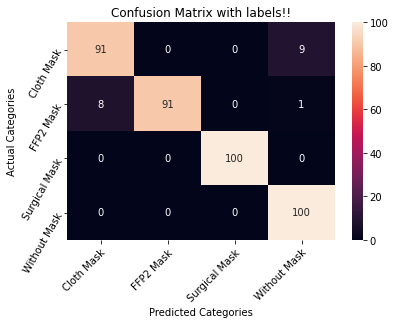

------------Generate Matrix of Female------------
Mask Male Image Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       109
           1       0.90      0.97      0.93        93
           2       0.99      1.00      0.99        99
           3       0.99      1.00      0.99        99

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Mask Male Image Confusion Matrix: 


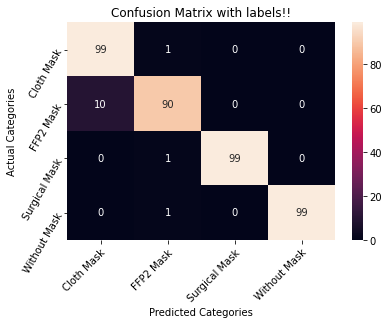

------------Generate Matrix of Child------------
Mask Child Image Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        92
           1       1.00      0.98      0.99       102
           2       1.00      1.00      1.00       100
           3       0.99      0.95      0.97       104

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

Mask Child Image Confusion Matrix: 


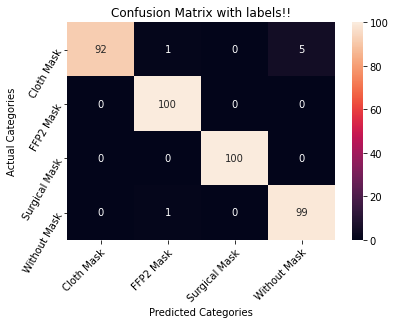

------------Generate Matrix of Young/Adult------------
Mask Young Image Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       101
           1       1.00      0.99      1.00       101
           2       0.96      1.00      0.98        96
           3       1.00      0.98      0.99       102

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Mask Young Image Confusion Matrix: 


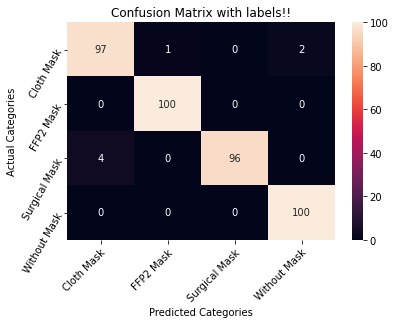

------------Generate Matrix of Old------------
Mask Old Image Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       1.00      0.96      0.98       104
           2       0.95      1.00      0.97        95
           3       0.98      0.97      0.98       101

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400

Mask Old Image Confusion Matrix: 


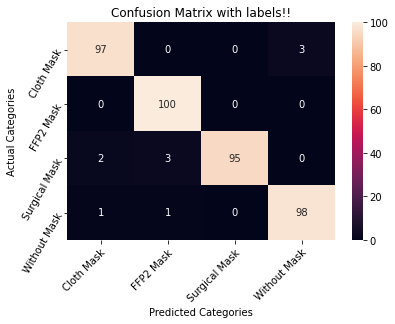

In [ ]:
print("------------Generate Matrix of Male------------")
generate_testing_matrix(model, "Mask Male Image", mask_male)
print("------------Generate Matrix of Female------------")
generate_testing_matrix(model, "Mask Male Image", mask_female)
print("------------Generate Matrix of Child------------")
generate_testing_matrix(model, "Mask Child Image", mask_child)
print("------------Generate Matrix of Young/Adult------------")
generate_testing_matrix(model, "Mask Young Image", mask_young)
print("------------Generate Matrix of Old------------")
generate_testing_matrix(model, "Mask Old Image", mask_old)

Image Name ['15_1_4_20170103233304142_cloth.jpg', '15_1_3_20170104222618503_cloth.jpg', '12_1_0_20170109204428993_cloth.jpg', '12_1_0_20170117154622148_cloth.jpg', '14_0_0_20170110225056665_cloth.jpg', '13_0_0_20170103200413990_cloth.jpg', '10_1_3_20170109205323078_cloth.jpg', '10_1_0_20170109205003280_cloth.jpg', '10_0_0_20170110225537307_cloth.jpg', '10_1_0_20170109204617417_cloth.jpg', '15_0_0_20170110232322390_cloth.jpg', '14_0_0_20170110225725643_cloth.jpg', '10_0_4_20170103201924664_cloth.jpg', '10_0_0_20170110220111082_cloth.jpg', '10_0_0_20170110225451638_cloth.jpg', '9_1_2_20170102235115156_cloth.jpg', '9_1_0_20170117180006484_cloth.jpg', '9_1_2_20161219192342173_cloth.jpg', '9_1_0_20170110224621441_cloth.jpg', '9_0_2_20161219192701323_cloth.jpg', '9_1_0_20170109204249427_cloth.jpg', '9_0_2_20170110224555634_cloth.jpg', '9_0_1_20170110225103801_cloth.jpg', '9_0_0_20170120133317677_cloth.jpg', '9_0_0_20170110225249086_cloth.jpg', '9_0_0_20170110225030430_cloth.jpg', '9_0_0_2017

100%|██████████| 100/100 [00:27<00:00,  3.65it/s]


Image Name ['27_1_3_20170104223444183_N95.jpg', '13_1_4_20170103212548662_N95.jpg', '13_1_4_20170103201542217_N95.jpg', '13_1_4_20170103200913055_N95.jpg', '13_1_4_20170103200733438_N95.jpg', '13_1_3_20170109213029072_N95.jpg', '13_0_0_20170110225428740_N95.jpg', '13_0_0_20170110225447389_N95.jpg', '13_1_0_20170120133325603_N95.jpg', '13_0_0_20170110225438328_N95.jpg', '13_0_0_20170110225302179_N95.jpg', '13_0_0_20170110225307195_N95.jpg', '13_0_0_20170110225045970_N95.jpg', '13_0_0_20170110225059227_N95.jpg', '13_0_0_20170110224801290_N95.jpg', '13_0_0_20170110224751365_N95.jpg', '13_0_0_20170110224745977_N95.jpg', '13_0_0_20170110224531616_N95.jpg', '13_0_0_20170110224625011_N95.jpg', '13_0_0_20170110224337867_N95.jpg', '13_0_0_20170110220242419_N95.jpg', '13_0_0_20170110220458081_N95.jpg', '13_0_0_20170104013342923_N95.jpg', '13_0_0_20170104012320089_N95.jpg', '13_0_0_20170104012531409_N95.jpg', '13_0_0_20170104012310089_N95.jpg', '12_1_0_20170109204815030_N95.jpg', '12_1_0_20170109

100%|██████████| 100/100 [00:26<00:00,  3.76it/s]


Image Name ['02037_Mask.jpg', '02036_Mask.jpg', '02028_Mask.jpg', '02022_Mask.jpg', '02019_Mask.jpg', '02013_Mask.jpg', '02005_Mask.jpg', '02003_Mask.jpg', '02083_Mask.jpg', '02082_Mask.jpg', '02081_Mask.jpg', '02079_Mask.jpg', '02077_Mask.jpg', '02076_Mask.jpg', '02075_Mask.jpg', '02074_Mask.jpg', '02073_Mask.jpg', '02069_Mask.jpg', '02067_Mask.jpg', '02066_Mask.jpg', 'image_109.png', '02065_Mask.jpg', '02063_Mask.jpg', '02061_Mask.jpg', '02060_Mask.jpg', '02055_Mask.jpg', '02051_Mask.jpg', '02054_Mask.jpg', '02049_Mask.jpg', '02044_Mask.jpg', '02046_Mask.jpg', '02166_Mask.jpg', '02165_Mask.jpg', '02156_Mask.jpg', '02164_Mask.jpg', '02155_Mask.jpg', '02148_Mask.jpg', '02146_Mask.jpg', '02141_Mask.jpg', '02143_Mask.jpg', '02136_Mask.jpg', '02132_Mask.jpg', '02131_Mask.jpg', '02126_Mask.jpg', '02129_Mask.jpg', '02116_Mask.jpg', '02115_Mask.jpg', '02104_Mask.jpg', '02102_Mask.jpg', '02100_Mask.jpg', '02094_Mask.jpg', '02092_Mask.jpg', '02089_Mask.jpg', '02086_Mask.jpg', '02085_Mask.jpg',

100%|██████████| 100/100 [01:25<00:00,  1.17it/s]


Image Name ['27_1_3_20170117180032189.jpg.chip.jpg', '27_1_3_20170117180001178.jpg.chip.jpg', '27_1_3_20170116200945357.jpg.chip.jpg', '27_1_3_20170109132029072.jpg.chip.jpg', '27_1_3_20170104232645690.jpg.chip.jpg', '27_1_3_20170104231620409.jpg.chip.jpg', '27_1_3_20170104231704778.jpg.chip.jpg', '27_1_3_20170104231549626.jpg.chip.jpg', '27_1_3_20170104231741609.jpg.chip.jpg', '27_1_3_20170104235412059.jpg.chip.jpg', '27_1_3_20170104231417083.jpg.chip.jpg', '58_0_0_20170111200444658.jpg.chip.jpg', '40_0_0_20170117152243349.jpg.chip.jpg', '39_1_4_20170105173036253.jpg.chip.jpg', '40_0_0_20170117151450653.jpg.chip.jpg', '58_0_0_20170111195305743.jpg.chip.jpg', '39_1_4_20170103163548640.jpg.chip.jpg', '58_0_0_20170111195225616.jpg.chip.jpg', '39_1_3_20170119204014702.jpg.chip.jpg', '39_1_3_20170119172010681.jpg.chip.jpg', '39_1_3_20170110173815028.jpg.chip.jpg', '39_1_3_20170109141053796.jpg.chip.jpg', '39_1_2_20170108225357064.jpg.chip.jpg', '37_0_0_20170109015606661.jpg.chip.jpg', '37_

100%|██████████| 100/100 [00:35<00:00,  2.78it/s]


Loading the dataset:
Shuffling Data:
Loading Data:
Generating Classification and Confusion Matrix: 
Testing Dataset Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       107
           1       0.93      0.95      0.94        98
           2       0.95      1.00      0.97        95
           3       0.95      0.95      0.95       100

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.94      0.94       400

Testing Dataset Confusion Matrix: 


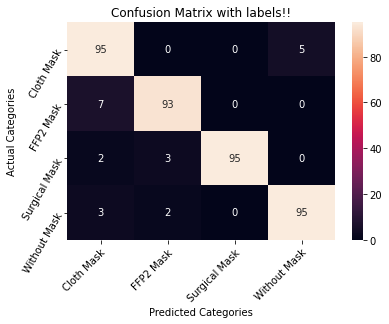

In [ ]:
test_data = []
test_data = load_data(test_data, cloth_testing_dataset, 0)
test_data = load_data(test_data, ffp2_testing_dataset, 1)
test_data = load_data(test_data, surgical_testing_dataset, 2)
test_data = load_data(test_data, without_mask_testing_dataset, 3)

print("Loading the dataset:")
test_dataset = testing_dataset_loader(test_data)

print("Generating Classification and Confusion Matrix: ")
generate_testing_matrix(model, "Testing Dataset", test_dataset)


In [ ]:
#Confusion Matrix - Accuracy, f-measure, recall and precision and also plotting confusion Matrix
def generate_matrix(model, title, data_loader, classes):
  model.eval()
  prediction_list = []
  accurate_list = []
  with torch.no_grad():
    for images, labels in data_loader:
      outputs = model(images)
      _, predicted = torch.max(model(images), 1)
      prediction_list.extend(predicted.detach().cpu().numpy())
      accurate_list.extend(labels.detach().cpu().numpy())
  print(prediction_list)
  print(accurate_list)
  print("{} Classification Report: ".format(title))
  print(classification_report(prediction_list, accurate_list))
  print("{} Confusion Matrix: ".format(title))
  
  confusion_matrix_data = confusion_matrix(accurate_list, prediction_list)
 
  #Plotting confusion matrix
  conf_matrix = sns.heatmap(confusion_matrix_data, annot=True, fmt='g' )

  conf_matrix.set_title('Confusion Matrix with labels!!');
  conf_matrix.set_xlabel('Predicted Categories')
  conf_matrix.set_ylabel('Actual Categories');

  print(label_dict)
  print(label_dict.get(0))
  
  
  conf_matrix.xaxis.set_ticklabels(["Cloth Mask", "FFP2 Mask", "Surgical Mask", "Without Mask"])
  conf_matrix.yaxis.set_ticklabels(["Cloth Mask", "FFP2 Mask", "Surgical Mask", "Without Mask"])

  plt.setp(conf_matrix.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
  plt.setp(conf_matrix.get_yticklabels(), rotation=60, ha="right",
         rotation_mode="anchor")
  
  plt.show()

  

[1, 0, 2, 3, 3, 1, 1, 2, 2, 3, 2, 3, 2, 2, 0, 2, 3, 3, 3, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 3, 0, 3, 1, 0, 3, 3, 0, 1, 3, 0, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 2, 0, 3, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 3, 2, 3, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 3, 3, 3, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 3, 0, 0, 2, 2, 3, 0, 3, 3, 1, 1, 2, 1, 1, 0, 1, 3, 1, 2, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1, 3, 3, 3, 0, 3, 1, 0, 2, 1, 2, 1, 2, 0, 2, 3, 2, 3, 0, 1, 0, 1, 1, 3, 2, 2, 2, 1, 1, 1, 3, 2, 3, 0, 2, 1, 1, 1, 0, 2, 3, 2, 2, 3, 3, 2, 2, 0, 3, 3, 1, 3, 1, 2, 2, 0, 2, 3, 1, 3, 1, 3, 1, 1, 0, 2, 3, 2, 1, 3, 1, 1, 2, 3, 3, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 0, 3, 3, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 3, 3, 1, 0, 0, 0, 2, 2, 3, 3, 3, 0, 2, 2, 1, 2, 2, 0, 3, 1, 3, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 3, 2, 1, 0, 1, 2, 1, 3, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 0, 3, 3, 2, 1, 2, 2, 1, 2, 0, 1, 2, 2, 3, 1, 2, 3, 2, 0, 2, 0, 0, 1, 1, 2, 2, 3, 2, 2, 2, 1, 0, 2, 3, 0, 0, 

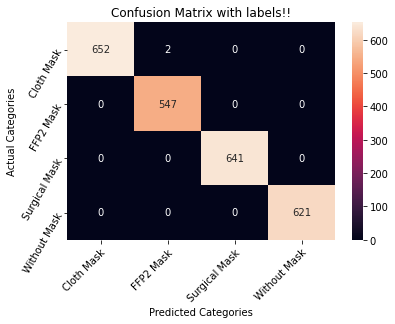

[3, 2, 0, 3, 1, 3, 0, 2, 3, 1, 0, 2, 1, 3, 2, 0, 1, 0, 1, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 1, 0, 1, 3, 2, 2, 3, 3, 3, 1, 3, 0, 0, 3, 2, 2, 1, 1, 1, 3, 2, 3, 1, 2, 0, 0, 0, 1, 3, 1, 0, 0, 1, 1, 2, 2, 0, 3, 0, 3, 1, 2, 2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 3, 3, 3, 0, 0, 1, 1, 2, 3, 1, 0, 3, 0, 0, 3, 0, 3, 3, 3, 2, 0, 1, 3, 1, 3, 1, 0, 1, 3, 2, 2, 1, 1, 2, 0, 2, 3, 0, 0, 1, 3, 2, 3, 3, 2, 1, 1, 0, 3, 1, 1, 1, 2, 3, 2, 3, 0, 2, 0, 1, 0, 3, 2, 0, 2, 0, 3, 0, 1, 1, 0, 3, 2, 0, 3, 1, 2, 3, 1, 0, 3, 0, 0, 2, 1, 3, 1, 3, 2, 1, 3, 3, 3, 1, 2, 3, 0, 3, 2, 1, 0, 0, 3, 0, 2, 1, 0, 3, 3, 0, 3, 0, 2, 2, 2, 0, 3, 1, 3, 2, 3, 0, 2, 2, 0, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 0, 1, 2, 1, 3, 0, 1, 1, 0, 0, 3, 3, 1, 0, 2, 3, 3, 1, 3, 3, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 3, 1, 3, 2, 2, 0, 3, 0, 3, 2, 2, 2, 2, 3, 0, 0]
[3, 2, 0, 3, 1, 3, 0, 2, 3, 1, 0, 2, 0, 3, 2, 0, 1, 0, 0, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 1, 1, 1, 3, 2, 2, 3, 3, 3, 1, 3, 0, 0, 3, 2, 2, 1, 0, 1, 3, 2, 3, 1, 2, 0, 1, 3, 1, 3,

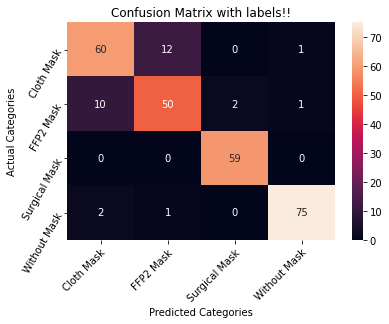

In [ ]:
generate_matrix(model, "Training", train_loader, classes)
generate_matrix(model, "Testing", test_loader, classes)